In [2]:
# Module Import
import numpy as np
#선대와 관련
import matplotlib.pyplot as plt
#시각화
import torch
#파이토치 기본 모듈
import torch.nn as nn
#인공신경망 설계에 필요한 모듈
import torch.nn.functional as F
#nn에서 많이 사용하는 함수 집합
from torchvision import transforms, datasets

In [3]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
    
print('Using Pytorch version: ', torch.__version__, 'Device: ', DEVICE )


Using Pytorch version:  1.12.0 Device:  cuda


In [4]:
BATCH_SIZE = 32
EPOCHS = 10


In [5]:
traind_dataset = datasets.MNIST(root = "../data/MNIST", train = True, download= True, transform= transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST", train = False, transform= transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = traind_dataset, batch_size= BATCH_SIZE, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= BATCH_SIZE, shuffle= False)


In [6]:
# data check
for (X_train, y_train) in train_loader:
    print('X_train: ', X_train.size(), 'type: ',X_train.type() )
    print('y_train: ', y_train.size(), 'type: ',y_train.type() )
    break

X_train:  torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


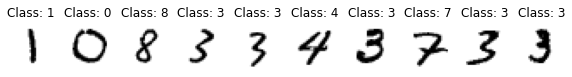

In [7]:
pltsize = 1 
plt.figure(figsize= (10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :].numpy().reshape(28,28), cmap= "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [12]:
#create MLP model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28, 28, 512) 
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1,28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

        

In [13]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=28, out_features=28, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
    if batch_idx % log_interval == 0:
        print("Train Epoch: {} [{} / {}({:.0f}%)]\tTrain Loss: {:.6f".format(batch_idx, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))
        